# 1. Introduction

We have with us the data for 891 passengers who were onboard the Titanic. While we have multiple attributes per passenger like the age, passenger class, number of parents/ siblings on board, port of embarkation, fare, etc; we also have the information whether the passenger survived or not. 

Through this exercise, we will try to investigate the data set to find out what characteristics were common between passengers who survived. In other words, 

> ** *What is the relation between the various variables and the chance of survival?* **

Throughout the analysis, we would be talking about **mean survival rates** of sub-groups of passengers which should give us a better understanding of which segments had a better chances of survival.

Further we will talk about what the supposed correlations tell us and whether they could mean plausible correlations. Further, as we have a subset of the total passengers travelling, we could use t-tests to validate our hypotheses.

However, do note that the analysis presented is post-event and specific to Titanic. It does not mean that the findings of this exercise will hold true for other such events in the past or in the future.

# 2. Data Cleaning

In this section, we will explore the given data set while also trying to do some preliminary analysis. We will be checking for data aberrations, empty/ null values and fixing them in an appropriate manner, derive some new features, and pave the ground for drawing conclusions through this exploratory study.

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

raw_data = pd.read_csv('titanic-data.csv')

Reading the contents of the file and storing it in a pandas data frame. 

Describing the data:

In [330]:
raw_data.columns.values #Columns within the data set
raw_data.dtypes
raw_data.head()
raw_data.describe()


#['Sex'].plot(kind='bar')

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data consists of 12 columns and 891 rows. Essentially, the data for 891 passengers who were on-board 'The Titanic' on that fateful night. We would like to dive a bit deeper into the data to understand the distribution of passengers on some of the key parameters like 'Pclass' (Passenger Class), 'Age','Sex', 'SibSp' (Number of Siblings on board),'Parch' (Number of Parents/ Children onboard), and 'Embark' (Port of Embarkation). 

The variable 'Ticket' would give us more idea about who all were travelling together (to account for Nannies, Mistresses, etc). 'Fare' could be a dervied metric and should be correlated with the 'Pclass' and the port of embarkment (Assumption). 'Cabin' could also give us more idea about how passengers were bunked together.

To start with, we need to check for NaNs across all columns.

## Checking for missing values & fixing them

In [331]:
print 'NaNs in PassengerId = ',pd.isnull(raw_data['PassengerId']).sum()
print 'NaNs in Survived = ',pd.isnull(raw_data['Survived']).sum()
print 'NaNs in Pclass = ',pd.isnull(raw_data['Pclass']).sum()
print 'Empty Values in Name = ',pd.isnull(raw_data['Name']).sum()
print 'Empty Values in Sex = ',pd.isnull(raw_data['Sex']).sum()
print 'NaNs in Age = ',pd.isnull(raw_data['Age']).sum()
print 'NaNs in SibSp = ',pd.isnull(raw_data['SibSp']).sum()
print 'NaNs in Parch = ',pd.isnull(raw_data['Parch']).sum()
print 'Empty Values in Ticket = ',pd.isnull(raw_data['Ticket']).sum()
print 'NaNs in Fare = ',pd.isnull(raw_data['Fare']).sum()
print 'Empty Values in Cabin = ',pd.isnull(raw_data['Cabin']).sum()
print 'Empty Values in Embarked = ', pd.isnull(raw_data['Embarked']).sum()

NaNs in PassengerId =  0
NaNs in Survived =  0
NaNs in Pclass =  0
Empty Values in Name =  0
Empty Values in Sex =  0
NaNs in Age =  177
NaNs in SibSp =  0
NaNs in Parch =  0
Empty Values in Ticket =  0
NaNs in Fare =  0
Empty Values in Cabin =  687
Empty Values in Embarked =  2


So, there are some NaNs in Age, Cabin, and Embarked which we need to account for. Apart from that, the data looks clean. Let's look at the rows where Embarked is null.

In [332]:
raw_data[pd.isnull(raw_data['Embarked'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Two passengers with no information on 'port of embarkation'. Seems like a data error. However, given that these are just two rows, we can choose to ignore these missing values and handle them if we encounter any issues.

How about the null values in 'Cabin'? Is there any pattern on the Nulls? More concentrated towards a particular gender? Or Pclass? Or a combination of both?

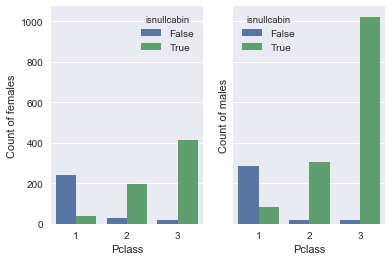

In [333]:
y=raw_data
y['isnullcabin'] = pd.isnull(y['Cabin']) #creating a new column to check if cabin column is null
tps = y.pivot_table(values=['Freq'], 
                      index=['Pclass','isnullcabin'],
                      columns = 'Sex',
                      aggfunc=np.size)
tps.reset_index(inplace=True)

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.barplot(data=tps, hue='isnullcabin', x='Pclass', y='female', ax=ax1).set_ylabel('Count of females')
sns.barplot(data=tps, hue='isnullcabin', x='Pclass', y='male', ax=ax2).set_ylabel('Count of males')

It looks like the field is empty not because of some data aberration but because people travelling in lower classes did not have cabins. Given that the absence of values in itself gives us some information about the passengers, it is safe to not bother about the missing values. How about Age?

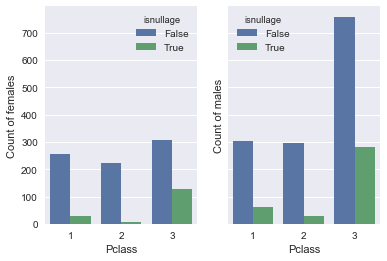

In [334]:
#raw_data[pd.isnull(raw_data['Age'])].groupby(['Sex','Pclass'], as_index=False).size()


y=raw_data
y['isnullage'] = pd.isnull(y['Age']) # new column to check if the 'Age' column in null
tps = y.pivot_table(values=['Freq'], 
                      index=['Pclass','isnullage'],
                      columns = 'Sex',
                      aggfunc=np.size)
tps.reset_index(inplace=True)

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.barplot(data=tps, hue='isnullage', x='Pclass', y='female', ax=ax1).set_ylabel('Count of females')
sns.barplot(data=tps, hue='isnullage', x='Pclass', y='male', ax=ax2).set_ylabel('Count of males')


We do need to find a fix for these missing values as they are a consirable fraction of the total subset. This will help us in describing and grouping various variables together. Fixing the missing values for Age using the fillna function. Replacing missing values with average age.

In [335]:
raw_data['Age'].fillna(raw_data['Age'].mean(),inplace=True)

In [336]:
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3 Exploratory Analysis

Now, having cleaned up the data, we are all set to analyse. The key question we are answering here is:

> ** *What are the characteristics of passengers who survived the ordeal? * **

Eyeballing the data, (and with a little bit of common sense, and repeated viewings of the movie 'Titanic') gives us an intuition that 'women and children' would have been evacuated the first and hence would have higher chances of survival. Further, people staying in the bottommost part of the ship would have found it difficult to flee or they would not have got enough time to respond (Mostly the people travelling in 3rd class)

Also, by extension of the same logic, people travelling in first class are more likely to have escaped (the fact that their cabins were further up, and the preference they would have got understandably)

Lets start by looking at some individual metrics:

We start by looking at the sample statistic - overall survival rate:

In [337]:
raw_data['Survived'].describe()['mean']

0.38383838383838381

A Mean of 0.38 which means that if this subset was actually the list of passengers travelling on Titanic, 38% of the people would have survived. Does this statistic vary by different subgroups? Let's first start with 'Sex': 

## 3.1 Sex

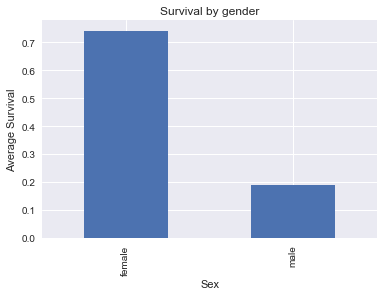

In [338]:
a=raw_data.groupby('Sex').mean()['Survived'].plot(kind='bar')
a.set_ylabel("Average Survival")
a.set_title("Survival by gender")
#raw_data.groupby('Sex').size()

Yes, women were indeed rescued first. Can we also look at childen (age<15 yrs)? We start by adding a column 'Children' by checking for the age and if its is less than 18. Do note that there were some rows which were empty and we used average values to fix them - hence this might not be a correct representation and would be just an approximation.

## 3.2 Age

Children
False    778
True     113
dtype: int64

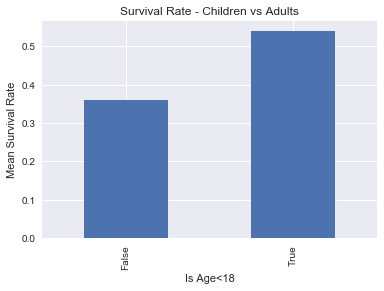

In [339]:
raw_data['Children'] = (raw_data['Age'] <18)
a=raw_data.groupby('Children').mean()['Survived'].plot(kind='bar')
a.set_ylabel('Mean Survival Rate')
a.set_xlabel('Is Age<18')
a.set_title('Survival Rate - Children vs Adults')
raw_data.groupby('Children').size()
#plt.plot(raw_data.groupby('Age',as_index=False).mean()['Age'], raw_data.groupby('Age',as_index=False).mean()['Survived'])

As we see above, Children of ages less than 18 did survive at means greater than the rest of the population. Let's see if we can look at the combined view of 'Women or Children'

## 3.3 Women OR Children

WomenOrChildren
False    519
True     372
dtype: int64

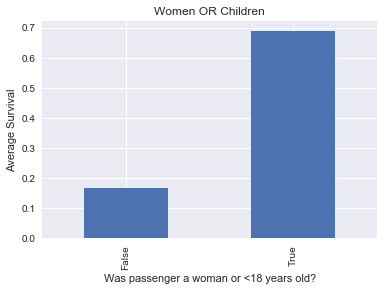

In [340]:
raw_data['WomenOrChildren'] = ((raw_data['Sex']=='female') | (raw_data['Children']==True))
a=raw_data.groupby('WomenOrChildren').mean()['Survived'].plot(kind='bar')
a.set_ylabel('Average Survival')
a.set_title('Women OR Children')
a.set_xlabel('Was passenger a woman or <18 years old?')
raw_data.groupby('WomenOrChildren').size()

Indeed! Women and Children were the first ones to be evacuated as seen from the above plot.

## 3.4 Travelling with families

We will next investigate the effect of people travelling with families. There are two variables in the data:

>  -  SibSp - # of siblings on board
>  -  Parch - # of parents or children on board

We can further create a new variable SiborPar to calculate teh family size.

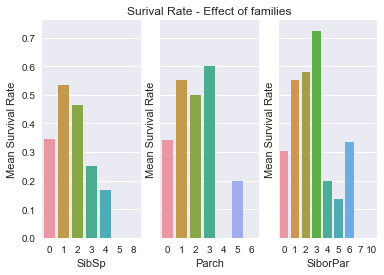

In [342]:
#plt.scatter(raw_data.groupby(['SibSp'],as_index=False).mean()['SibSp'], raw_data.groupby(['SibSp'])['Survived'].mean()) 
x=raw_data.groupby(['SibSp'],as_index=False).mean()
y=raw_data.groupby(['Parch'],as_index=False).mean()
raw_data['SiborPar'] = raw_data['SibSp'] + raw_data['Parch']
z=raw_data.groupby(['SiborPar'], as_index=False).mean()

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
a= sns.barplot(data=x, x='SibSp', y='Survived', ax=ax1).set_ylabel('Mean Survival Rate')
b= sns.barplot(data=y, x='Parch', y = 'Survived', ax=ax2)
b.set_ylabel('Mean Survival Rate')
b.set_title('Surival Rate - Effect of families')
sns.barplot(data=z, x='SiborPar', y = 'Survived', ax=ax3).set_ylabel('Mean Survival Rate')

The plot gives us some idea about three possible hypotheses - 
-  survivability increases if a passenger was travelling with atleast one family memeber vs None

-  more the number of siblings - lower the chances of survival.

-  When SiborPar (or family size) is greater than 3, survivability falls drastically

But, correlation does not imply causation. We havent explored other variables yet (I have a gut feeling that the family size is also linked to the 'Pclass'). Let's look at that particular combination:

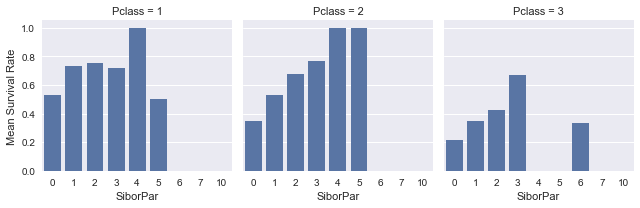

In [343]:
x=raw_data.groupby(['SiborPar', 'Pclass'],as_index=False).mean()
aa=sns.FacetGrid(x, col='Pclass')
aa.map(sns.barplot, 'SiborPar', 'Survived')
aa.set_titles(col_template='Pclass = ' + '{col_name}')
aa.set_ylabels('Mean Survival Rate')

From the above chart (n=number of family members on board):
-  For all classes: survivability increases with number of family members travelling
-  For first class: dips at n=3, but still greater than n=0
-  For third class: the means are much lower than first and second classes. 

We can further refine the above chart by looking at 'Women or children' vs 'Others'. Below chart tries to incorporate that:


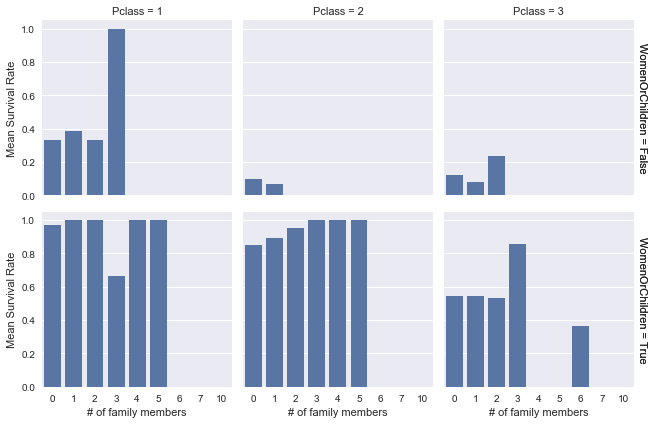

In [344]:
x=raw_data.groupby(['SiborPar', 'Pclass', 'WomenOrChildren'],as_index=False).mean()
aa=sns.FacetGrid(x, col='Pclass', row='WomenOrChildren', margin_titles=True)
aa.map(sns.barplot, 'SiborPar', 'Survived')
aa.set_titles(col_template='Pclass = ' + '{col_name}')
aa.set_ylabels('Mean Survival Rate')
aa.set_xlabels('# of family members')

The above chart gives intersting insights:
-  For first : survival rates are almost equal to 1. This could be because we have sliced the data so many times that we have single element segments. Nevertheles, it does give us some important observations.
-  For second class and third class 'Women or Children' segment, the insights are consistent with what we saw before: survival rates increases with n
-  For adult males, survivability is at very low levels for second class and third class passengers

## 3.5 Passenger Class and port of embarkation

Even though we have looked at 'Pclass' in preceding sections, we would want to analyse the variable independently.

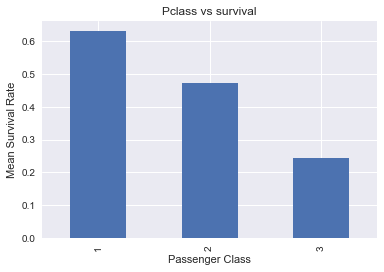

In [345]:
x= raw_data.groupby(['Pclass']).mean()['Survived'].plot(kind='bar')
x.set_ylabel('Mean Survival Rate')
x.set_xlabel('Passenger Class')
x.set_title('Pclass vs survival')


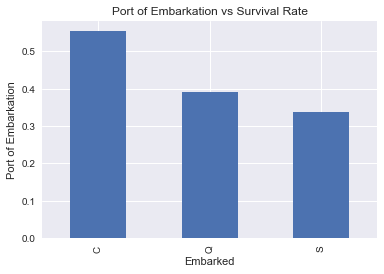

In [346]:
x=raw_data.groupby('Embarked').mean()['Survived'].plot(kind='bar')
x.set_ylabel('Mean Survival Rate')
x.set_ylabel('Port of Embarkation')
x.set_title('Port of Embarkation vs Survival Rate')

Pclass variable shows that 1st class passengers were more likely to survive as compared to 2nd and 3rd class. Also, passengers who embarked from port 'C' were more likey to survive. Do we see some kind of correlation here? Let's check if most of the 1st class passengers boarded from port 'C'

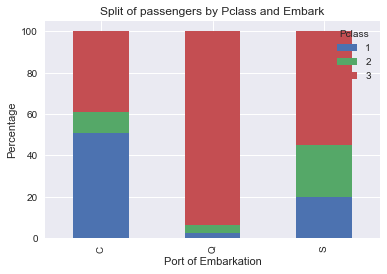

In [347]:
p_table = pd.pivot_table(raw_data, index = 'Embarked', columns = 'Pclass', aggfunc='size')
p_table = p_table.div(p_table.sum(axis=1)*.01, axis=0)
x=p_table.plot.bar(stacked=True)
x.set_ylabel('Percentage')
x.set_xlabel('Port of Embarkation')
x.set_title('Split of passengers by Pclass and Embark')

So, about 50 percent of the people who embarked at port 'C' belonged to first class. Still doesnt tell us much. We will assume that the port of embarkation has no direct relation with the survivability of passengers

# 4. Feature Engineering

## 4.1 Travelling together (and not just families)

Moving on, there are other columns in the data 'Cabin' and 'Ticket'. Many of these rows have nulls, but we can derive much more information using these columns. For e.g. we can assume that people bunked in the same 'Cabin' or travelling on the same 'Ticket' number were travelling together. This might give us some more information other than 'SibSp' and 'Parch' as some of the relations have been ignored in these variables. Let's combine all these variables into one single column 'Together' which would be True if either of the following conditions are met:

-  Parch>=1
-  Sibsp>=1
-  Ticket number matches with another passenger
-  Cabin number matches with another passenger

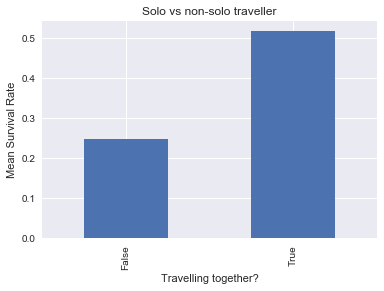

In [348]:

new=[]
new2=[]

for row in raw_data.itertuples():
    comparev= row[9]
    count = 0
    for rowz in raw_data.itertuples():
        if rowz[9]==comparev:
            count = count+1
    if count > 1:
        new.append(True)
    else:
        new.append(False)

for row in raw_data.itertuples():
    comparev= row[11]
    count = 0
    for rowz in raw_data.itertuples():
        if rowz[11]==comparev:
            count = count+1
    if count > 1:
        new2.append(True)
    else:
        new2.append(False)

check = ((raw_data['SibSp']>0) | (raw_data['Parch']>0) | new | new2)
raw_data['Together']=check
x=raw_data.groupby(['Together']).mean()['Survived'].plot(kind='bar')
x.set_ylabel('Mean Survival Rate')
x.set_xlabel('Travelling together?')
x.set_title('Solo vs non-solo traveller')

Did we really improve anything? Are we able to identify the survivors based on this newly created column? Probably. The mean survival rate of passengers clubbed under the column 'Travelling together' is close to 0.5 versus the sample mean of 0.38 and that of solo travellers at ~0.25. Let's stry slicing up the data even more:

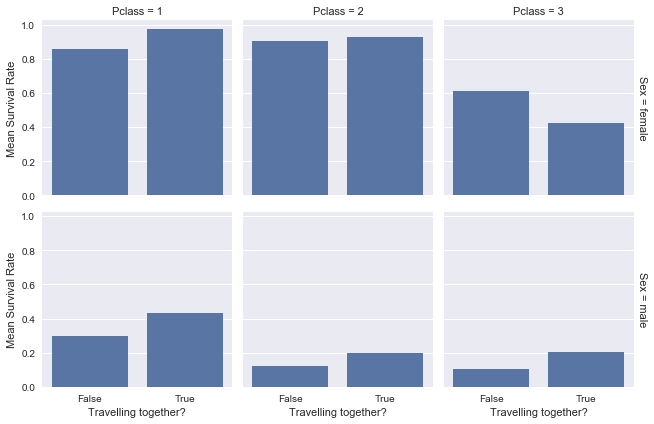

In [324]:
x=raw_data.groupby(['Together','Sex','Pclass'], as_index=False).mean()
p = sns.FacetGrid(x, col = 'Pclass', row='Sex', margin_titles = True)
p.map(sns.barplot, 'Together', 'Survived')
(p.set_axis_labels('Travelling together?', 'Mean Survival Rate')
.set_titles( row_template = '                           ', col_template = 'Pclass = ' + '{col_name}'))

From the above chart, except for females travelling in third class, survivability does increase as compared to travelling solo. We should probably use our variable 'WomenOrchildren' instead of just 'Sex'

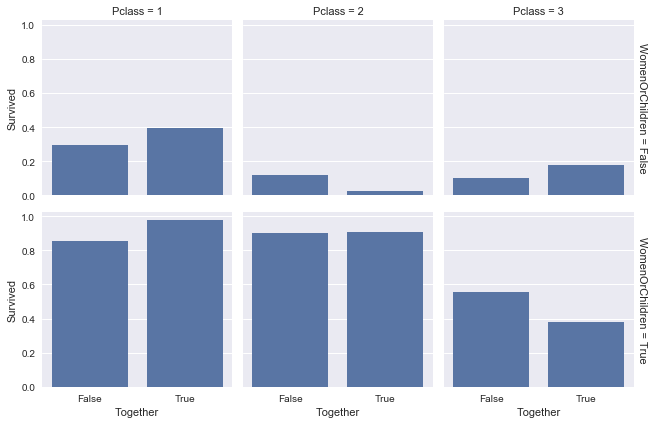

In [349]:
z=raw_data.groupby(['WomenOrChildren','Pclass','Together'], as_index=False).mean()
gg=sns.FacetGrid(z, row='WomenOrChildren', col='Pclass', margin_titles=True)
gg.map(sns.barplot, 'Together','Survived')

Still the same insight: women or children travelling in third class were better off travelling alone rather than with co-passengers.

To conclude:

>Women or Children who were travelling together were in general more probable to survive except for the 3rd class passengers where the chances of them surviving if they were travelling alone was higher. Men were in general less likely to survive; however their survivablility also increases when they are travelling together (except for second class passengers)

## 4.2 Passengers with Noble titles

Based on this article (http://trevorstephens.com/kaggle-titanic-tutorial/r-part-4-feature-engineering/), we can add an additional dimension to our data by looking at the titles in the 'Name' columns. The below code extracts the information about titles and family names and adds it back to the raw_data

In [350]:
def extract_title(name_input):
    f1=name_input.find(',')
    family_name = name_input[:f1]
    name_input=name_input[f1+2:]
    f2=name_input.find(".")
    title1=name_input[:f2]
    return title1

def extract_family(name_input):
    f1=name_input.find(',')
    family_name = name_input[:f1]
    name_input=name_input[f1+2:]
    f2=name_input.find(".")
    title1=name_input[:f2]
    return family_name

raw_data['Title']= raw_data['Name'].apply(extract_title)
raw_data['family_name'] = raw_data['Name'].apply(extract_family)

Next we try segregating the 'Noble' titles and look at the survival metrics:

In [351]:
raw_data['Noble']=~raw_data['Title'].isin(['Master','Miss','Mr','Mrs','Ms'])
raw_data[raw_data['Noble']].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,isnullcabin,isnullage,Children,WomenOrChildren,SiborPar,Together,Title,family_name,Noble
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,...,C,True,False,False,False,0,False,Don,Uruchurtu,True
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,...,S,True,False,False,False,0,False,Rev,Byles,True
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,...,S,True,False,False,False,0,False,Rev,Bateman,True
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,...,Q,False,False,False,False,2,True,Dr,Minahan,True
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,...,S,True,False,False,False,1,True,Rev,Carter,True


In [352]:
raw_data['Noble'].sum()*100.0/ raw_data['Noble'].count()
raw_data.groupby(['Noble']).mean()['Survived']

2.9180695847362514

Noble
False    0.382659
True     0.423077
Name: Survived, dtype: float64

Even though, we did manage to add an additional dimension, it is a very small percentage (<3%) of the entire data set and which does not even have an exceptional impact on survival rates. However, we might want to look at the dimension in conjunction with other factors (like age, or gender, etc). For the sake of simplicity, we will not pursure this any further

#  4. Conclusions

While we have investigated the data across couple of dimensions, some of them (dimensions) make more sense than others while trying to find a relation with survivability. Some of the key insights are:

>  -  The survivability increases when passengers are travelling together with family members, or friends

>  -  Chances of survival are higher for the subsegment 'Women or Children' (Children are all passengers below the age of 18)

>  -  First class passengers were more likely to survive than second class who were more likely to survive than the third class passengers

>  -  Port of embarkation is correlated to the passenger class and has no direct relation with survivability

The key chart that one would want to look for would be:

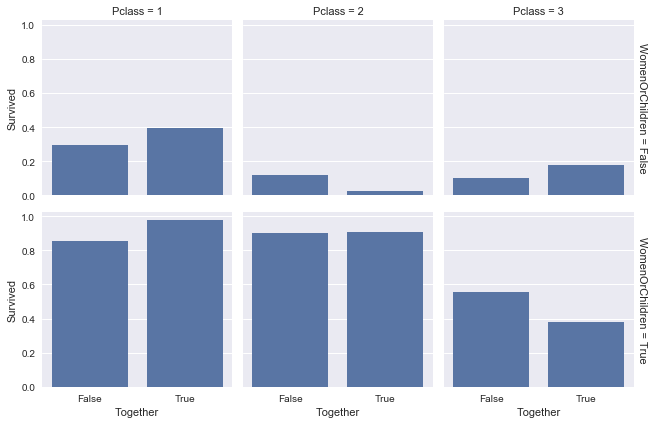

In [353]:
z=raw_data.groupby(['WomenOrChildren','Pclass','Together'], as_index=False).mean()
gg=sns.FacetGrid(z, row='WomenOrChildren', col='Pclass', margin_titles=True)
gg.map(sns.barplot, 'Together','Survived')

# 4. Limitations

- We have been making assumptions about the data without conducting any t-tests or z-tests. Sometimes, samples are not the correct representation of the population and hence tests need to be conducted in order to make assumptions with reasonable confidence levels. We have ignored this particular part in our analysis


- There were missing values in our data (the 'Age' column) which we chose to replace with sample means. This was just to make sure that we do not omit values while analysing the data as we would like to look at the entire subset while making assumptions. The insight around the 'Age' dimension may not be the accurate representation of the data as we slice the subset further on other dimensions. But, it is a tradeoff we have to live with.


- While we investigated the data, we were mindful of the spurious correlations (like our assumption on port of embarkment's relation with survivability). Most of the correlations we have investigated do seem to hold water as they seem logical. However, it is difficult to say, just from the data, the difference between correlation and causation. Some sort of logical and contextual reasoning needs to be taken into account for making assumptions.

# 5. Reflections

While we tried to look at all possible dimensions present in the data, there is no such thing as 'enough ' data. We could certainly use more information around 

-  how close were each cabins to the exit points
-  how close were the cabins to the plane of rupture
-  Information if a particular passenger was disabled
-  Information on whether a passenger was a crew member
-  Information on medical conditions of passengers (very optimistic ask, but still a plausible dimension to determine whether a passenger would have panicked or held their nerves after the ship hit the iceberg)

The above are just examples of how additional information can help us make our analysis even better. 

The next steps would probably to build predictive models with the given data set and try to test them against the with-held data. This would help us validate our assumptions and understand the correlations much better.